# Import libraries and dataset

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 200

In [38]:
df = pd.read_csv(r"C:\Users\Cris\Documents\Cris\Academic\Python\Titanic\titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

In [39]:
df.drop(columns=["PassengerId"], inplace=True)
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


## Age

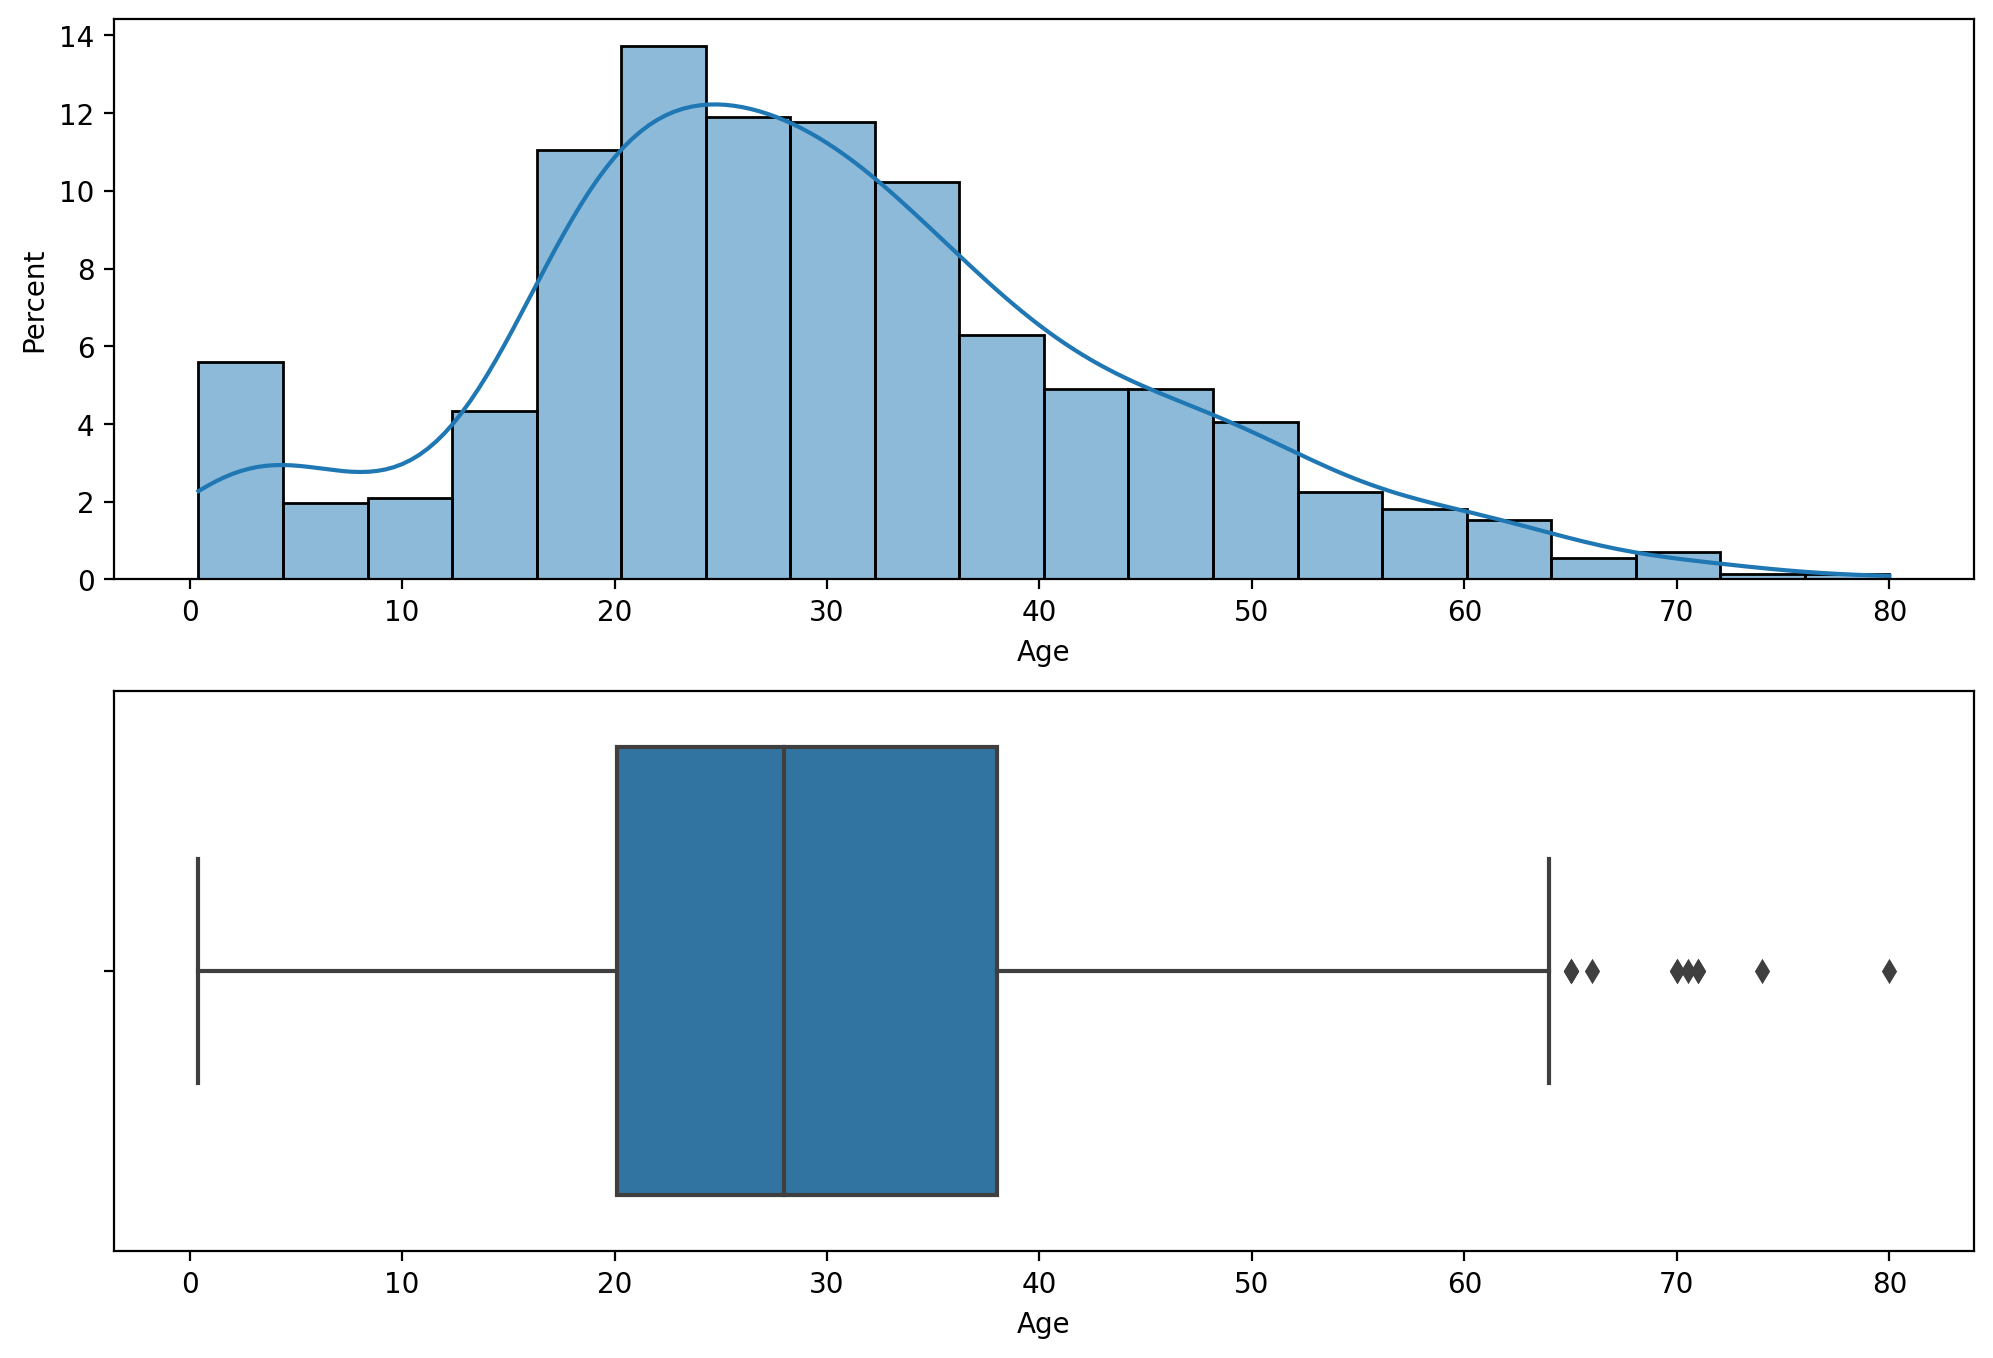

In [41]:
fig, axes = plt.subplots(2, figsize=(12,8))
sns.histplot(df.Age, kde=True, stat="percent", ax = axes[0])
sns.boxplot(x=df.Age, ax=axes[1])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

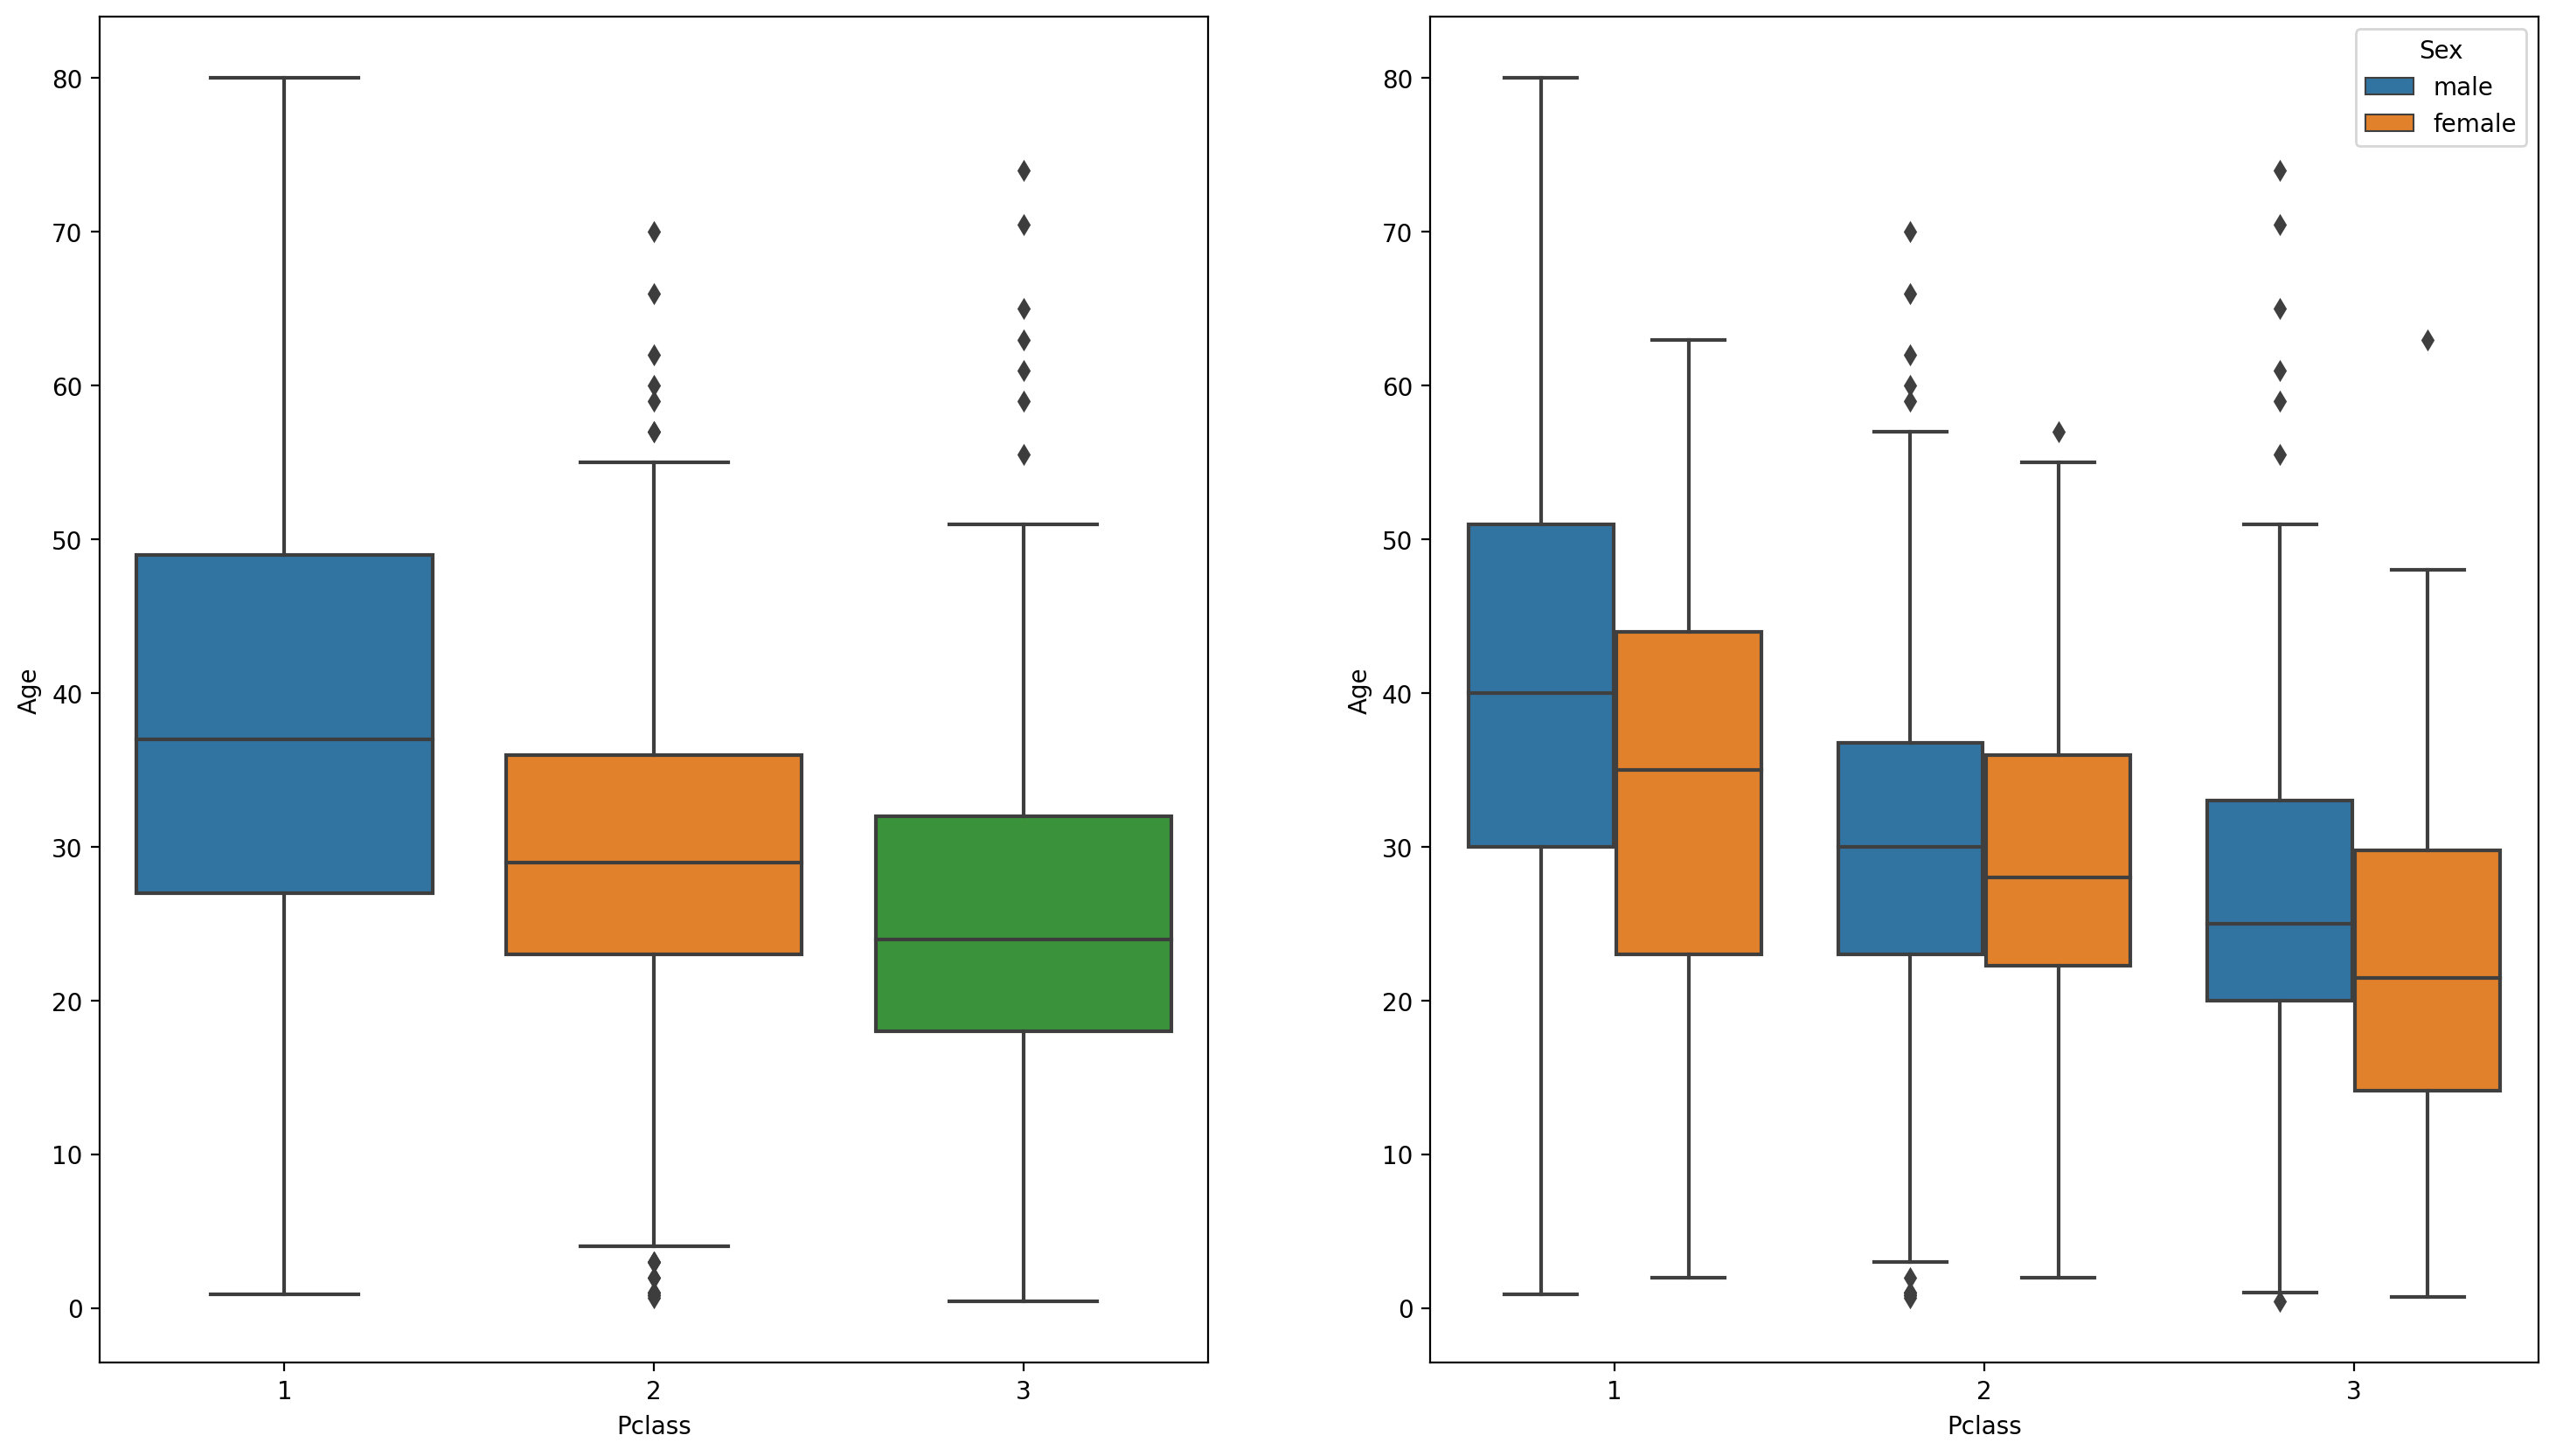

In [53]:
fig, axes = plt.subplots(1,2, figsize=(18,10))
sns.boxplot(data=df, x="Pclass", y="Age", ax=axes[0])
sns.boxplot(data=df, x="Pclass", y="Age", hue="Sex", ax=axes[1])
plt.show()

# Fare

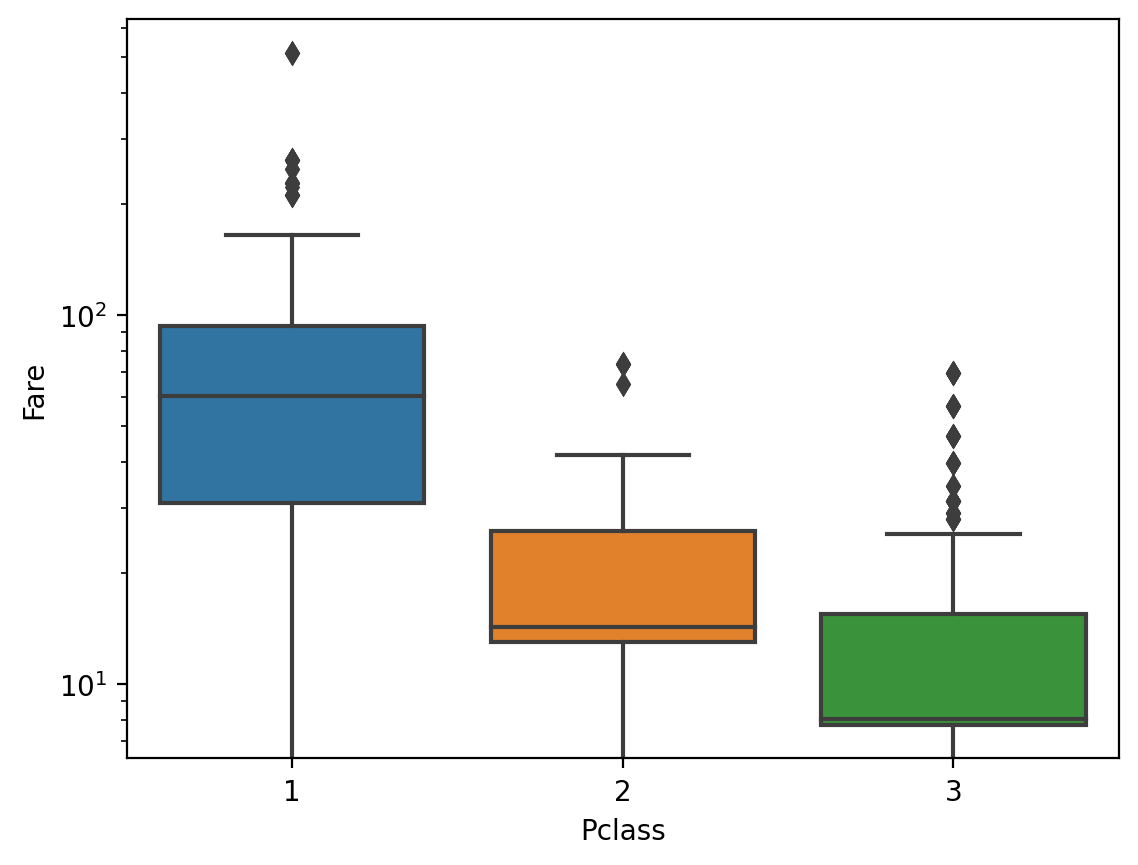

In [56]:
fig, ax = plt.subplots()
sns.boxplot(data=df, x="Pclass", y="Fare")
ax.semilogy()
plt.show()

## Null values handling

In [6]:
# df.Age.fillna(df.Age.mean, inplace=True)

# Feature Extraction

In [7]:
# Turn sex into one-hot, 1 is female, 0 is male
df["Sex"] = pd.get_dummies(df.Sex)["female"]
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Lone travelers
alone = (df.SibSp < 1) & (df.Parch < 1)
df["Alone"] = alone.astype(int)

In [9]:
# Ticket Class
df[["Class1", "Class2", "Class3"]] = pd.get_dummies(df.Pclass)

In [10]:
# Embarking place
df[["Cherbourg", "Queenstown", "Southampton"]] = pd.get_dummies(df.Embarked)
df.drop(columns=["Embarked", "Pclass"], inplace=True)

## Cabins and Classes

In [11]:
cabin = df[df.Cabin.notna()].dropna()

decks = ["A", "B", "C", "D", "E"]
for d in decks:
    titanic_class = cabin.Cabin.str.contains(d).astype(int)
    cabin["Deck_"+d] = titanic_class

cabin.sum(numeric_only=True)

Survived         125.0000
Sex               90.0000
Age             6628.4200
SibSp             85.0000
Parch             87.0000
Fare           14558.8918
Alone             81.0000
Class1           160.0000
Class2            15.0000
Class3            10.0000
Cherbourg         65.0000
Queenstown         2.0000
Southampton      116.0000
Deck_A            12.0000
Deck_B            45.0000
Deck_C            51.0000
Deck_D            31.0000
Deck_E            30.0000
dtype: float64

In [12]:
# fig, ax = plt.subplots(figsize=(14,8))
# sns.heatmap(cabin.corr(numeric_only=True), annot=True)
# plt.show()

In [13]:
# for i,d in enumerate(decks):
#     titanic_class = first_class_cabin.str.contains(d).astype(int)
#     first_class_cabin[[d]] = titanic_class

In [14]:
# Feature extraction idea: family divisions? Lone travelers?
# df[df.Name.str.contains("Palsson")]
# df[(df.SibSp < 2) & (df.Parch > 2)]

# Travel alone category
# Parent, number of children
# Child, number of siblings